In [1]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import Class

In [23]:
def plot_spectra(ell, factor, cls, cls_ref, cmb, parms_ref_val, name):
    
    act_cmb = np.copy(cmb)
    fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 3, figsize=(20, 8), dpi=80, gridspec_kw={'width_ratios': [1, 3, 3]})
    plt.subplots_adjust(hspace=0.05, wspace=0.20)

    for ii in range(0,3):
        if(ii==2): factor = ell*ell*ell*factor; 
        if(ii==2): act_cmb[:,1] *= act_cmb[:,0]**3.;
        if(ii==2): act_cmb[:,2] *= act_cmb[:,0]**3.;
        for i, x in enumerate(cls.keys()):
            ax1[ii].plot(ell, factor*cls[x]['tt'], alpha=0.5*(1+i), color='Grey', label=x)
            ax2[ii].plot(ell, factor*cls[x]['te'], alpha=0.5*(1+i), color='Grey', label=x)
            ax3[ii].plot(ell, factor*cls[x]['ee'], alpha=0.5*(1+i), color='Grey', label=x)
        
            ax1[ii].errorbar(act_cmb[0:mask[0],0], act_cmb[0:mask[0],1], yerr=act_cmb[0:mask[0],2],marker=".",ls='none',c='black')
            ax2[ii].errorbar(act_cmb[mask[0]+1:mask[1],0], act_cmb[mask[0]+1:mask[1],1], yerr=act_cmb[mask[0]+1:mask[1],2],marker=".",ls='none',c='black')
            ax3[ii].errorbar(act_cmb[mask[1]+1:mask[2],0], act_cmb[mask[1]+1:mask[2],1], yerr=act_cmb[mask[1]+1:mask[2],2],marker=".",ls='none',c='black')
            ax1[ii].errorbar(act_cmb[mask[2]+1:mask[3],0], act_cmb[mask[2]+1:mask[3],1], yerr=act_cmb[mask[2]+1:mask[3],2],marker="*",ls='none',c='black')
            ax2[ii].errorbar(act_cmb[mask[3]+1:mask[4],0], act_cmb[mask[3]+1:mask[4],1], yerr=act_cmb[mask[3]+1:mask[4],2],marker="*",ls='none',c='black')
            ax3[ii].errorbar(act_cmb[mask[4]+1:,0], act_cmb[mask[4]+1:,1],marker="*",ls='none',c='black')
    
        ax1[ii].plot(ell, factor*cls_ref['tt'], color='Red', label=parms_ref_val)
        ax2[ii].plot(ell, factor*cls_ref['te'], color='Red', label=parms_ref_val)
        ax3[ii].plot(ell, factor*cls_ref['ee'], color='Red', label=parms_ref_val)

        ax1[ii].set_ylabel(r"$D_{\ell}^{TT}$ $[\mu K^2]$")
        ax2[ii].set_ylabel(r"$D_{\ell}^{TE}$ $[\mu K^2]$")
        ax3[ii].set_ylabel(r"$D_{\ell}^{EE}$ $[\mu K^2]$")
        
    ax1[2].set_ylabel(r"$\ell^{3}D_{\ell}^{TT}$ $[\mu K^2]$")
    ax2[2].set_ylabel(r"$\ell^{3}D_{\ell}^{TE}$ $[\mu K^2]$")
    ax3[2].set_ylabel(r"$\ell^{3}D_{\ell}^{EE}$ $[\mu K^2]$")
    
    
    ax1[1].fill_between([0,600],[-5000,-5000],[5000,5000], color='Grey', alpha=0.2)
    
    ax1[0].set_xlim(50,340);   ax2[0].set_xlim(50,340);   ax3[0].set_xlim(50,340)
    ax1[1].set_xlim(340,1500); ax2[1].set_xlim(340,1500); ax3[1].set_xlim(340,1500)
    ax1[2].set_xlim(1500,4000);ax2[2].set_xlim(1500,4000);ax3[2].set_xlim(1500,4000)
    
    ax1[0].set_ylim(1000,6000);ax2[0].set_ylim(-60,140);ax3[0].set_ylim(-1,20);#ax3[0].set_yscale('log')  
    ax1[1].set_xscale('log');ax2[1].set_xscale('log');ax3[1].set_xscale('log');
    
    ax1[1].set_ylim(-100,3000); #ax1[2].set_yscale('log');
    
    ax1[1].legend()
    plt.savefig(name, dpi=150)

In [4]:
common_settings = {#Outputs of interest
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'ln10^{10}A_s':3.0448,
                   'n_s':0.96605,
                   'k_pivot':0.05,
                   'omega_b':0.022383,
                   'omega_cdm':0.12011,
                   #'h':0.6732,                              
                   'tau_reio':0.0543,
                   'YHe':'BBN',
                   # other output and precision parameters
                   'l_max_scalars':5000}

In [5]:
act_cmb = np.loadtxt('act_dr4_cmbonly.txt')
act_cmb[:,2] = np.abs(act_cmb[:,2])
mask = np.where(np.diff(act_cmb[:,0])<0)[0]
for i in range(1,3):
    act_cmb[0:mask[0],i] *= act_cmb[0:mask[0],0]*(act_cmb[0:mask[0],0]+1.)/2./np.pi
    act_cmb[mask[0]+1:mask[1],i] *= act_cmb[mask[0]+1:mask[1],0]*(act_cmb[mask[0]+1:mask[1],0]+1)/2./np.pi
    act_cmb[mask[1]+1:mask[2],i] *= act_cmb[mask[1]+1:mask[2],0]*(act_cmb[mask[1]+1:mask[2],0]+1)/2./np.pi
    act_cmb[mask[2]+1:mask[3],i] *= act_cmb[mask[2]+1:mask[3],0]*(act_cmb[mask[2]+1:mask[3],0]+1)/2./np.pi
    act_cmb[mask[3]+1:mask[4],i] *= act_cmb[mask[3]+1:mask[4],0]*(act_cmb[mask[3]+1:mask[4],0]+1)/2./np.pi
    act_cmb[mask[4]+1:,i]        *= act_cmb[mask[4]+1:,0]*(act_cmb[mask[4]+1:,0]+1.)/2./np.pi

In [6]:
M = Class()
M.set(common_settings)
M.set({'h':0.6732})
M.compute()
cls_ref = M.lensed_cl(5000)

In [7]:
ell = cls_ref['ell']
factor = ((M.T_cmb()*1e6)**2.)*ell*(ell+1.)/2./math.pi

In [8]:
#Let's compute a few cosmologies
cls_h0 = {}
h_vals = [60, 74]
for i, param in enumerate(h_vals):
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    M = Class()
    M.set(common_settings)
    M.set({'h':param/100.})
    M.compute()
    cls_h0.update({r"$H_0=$"+str(param):M.lensed_cl(5000)})   

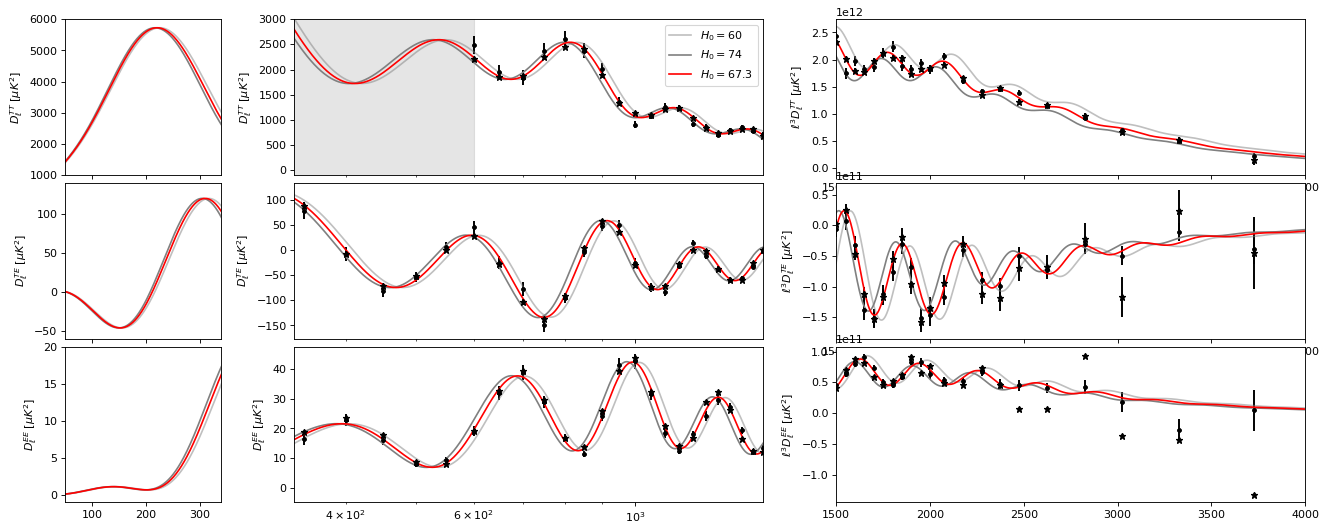

In [9]:
plot_spectra(ell, factor, cls_h0, cls_ref, act_cmb, r"$H_0=67.3$","H0.pdf")

In [10]:
#Let's compute a few cosmologies
cls_theta = {}
theta_vals = [1.02,1.06]
for i, param in enumerate(theta_vals):
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    M = Class()
    M.set(common_settings)
    M.set({'100*theta_s':param})
    M.compute()
    cls_theta.update({r"$100\theta_{\ast}=$"+str(param):M.lensed_cl(5000)})   

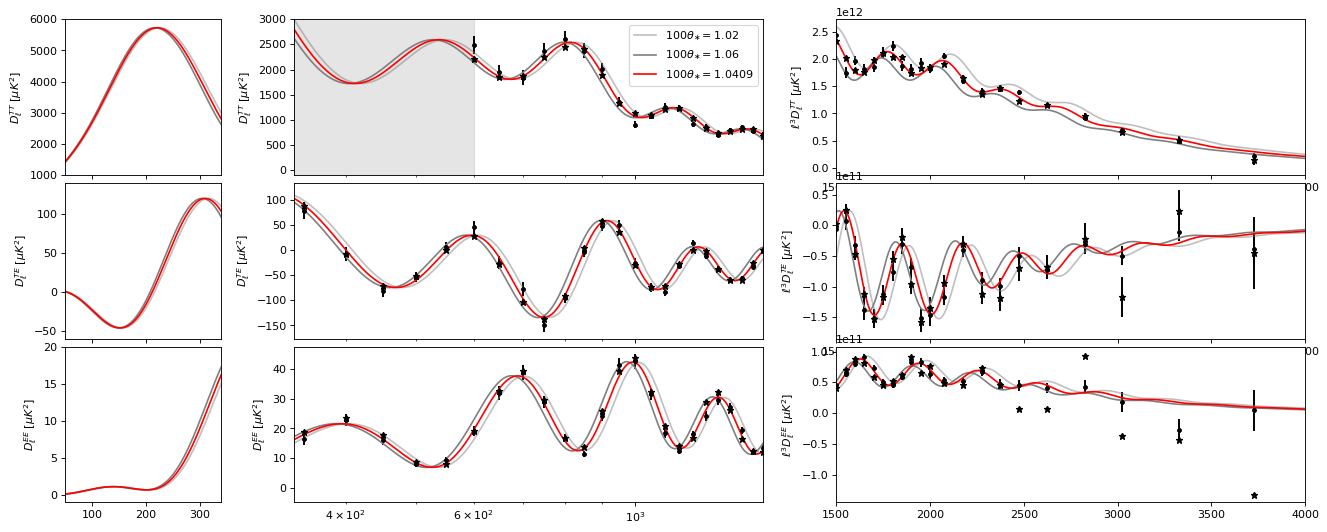

In [12]:
plot_spectra(ell, factor, cls_theta, cls_ref, act_cmb, r"$100\theta_{\ast}=1.0409$","theta.pdf")

In [13]:
#Let's compute a few cosmologies
cls_omega_cdm = {}
omega_cdm_vals = [0.10,0.14]
for i, param in enumerate(omega_cdm_vals):
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    M = Class()
    M.set(common_settings)
    M.set({'h':0.6732})
    M.set({'omega_cdm':param})
    M.compute()
    cls_omega_cdm.update({r"$\Omega_{c}h^{2}=$"+str(param):M.lensed_cl(5000)}) 

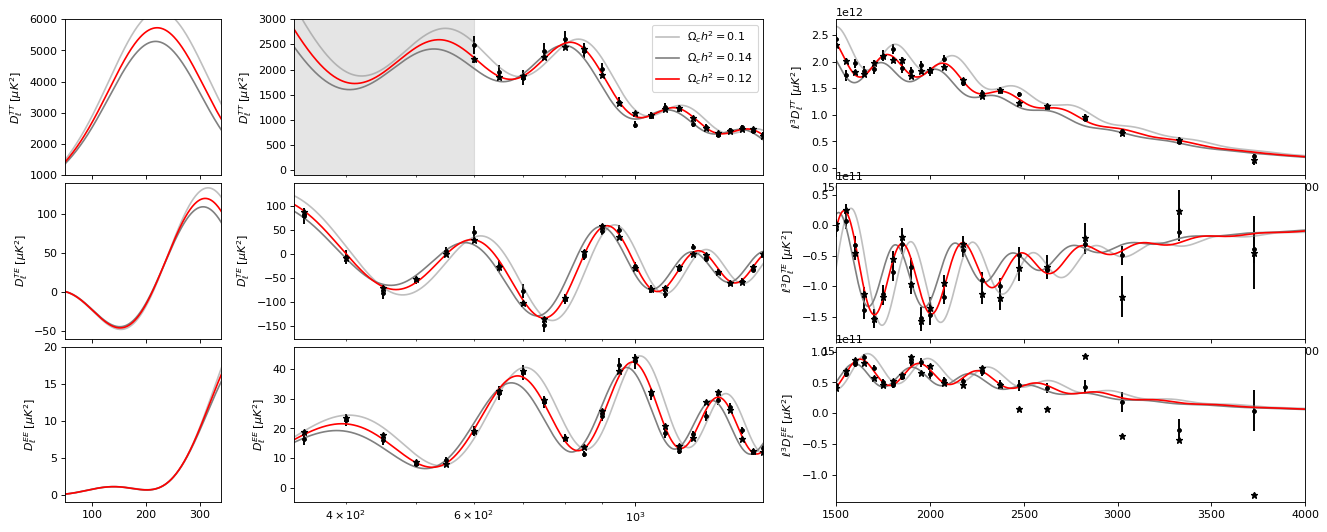

In [14]:
plot_spectra(ell, factor, cls_omega_cdm, cls_ref, act_cmb, r"$\Omega_{c}h^{2}=0.12$", "omega_c.pdf")

In [15]:
#Let's compute a few cosmologies
cls_omega_b = {}
omega_b_vals = [0.018,0.028]
for i, param in enumerate(omega_b_vals):
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    M = Class()
    M.set(common_settings)
    M.set({'h':0.6732})
    M.set({'omega_b':param})
    M.compute()
    cls_omega_b.update({r"$\Omega_{b}h^{2}=$"+str(param):M.lensed_cl(5000)}) 

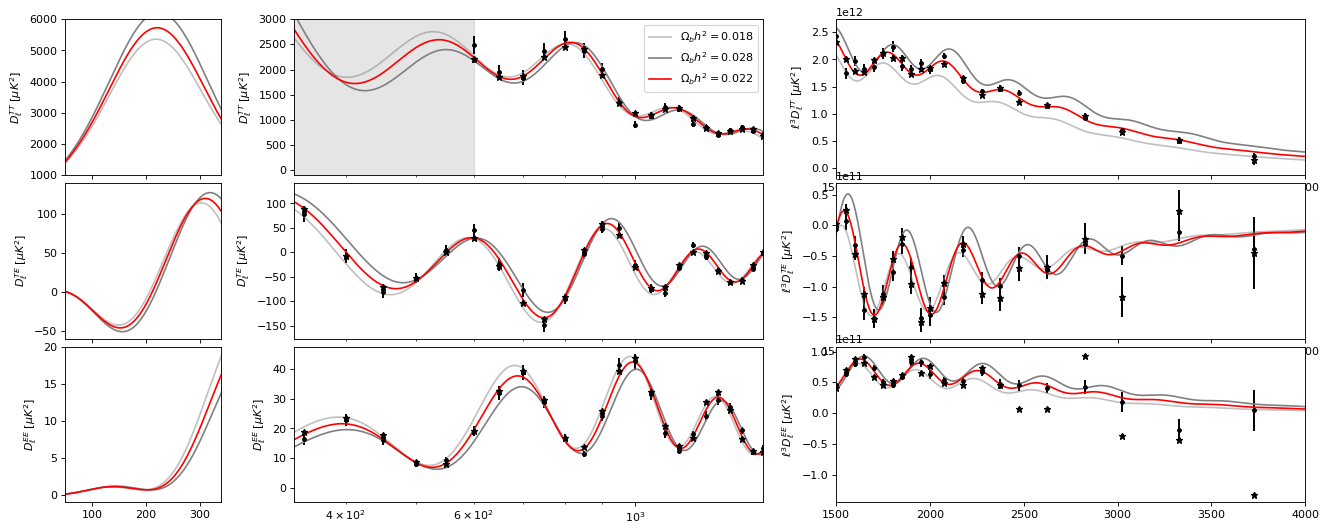

In [16]:
plot_spectra(ell, factor, cls_omega_b, cls_ref, act_cmb, r"$\Omega_{b}h^{2}=0.022$", "omega_b.pdf")

In [17]:
#Let's compute a few cosmologies
cls_ns = {}
ns_vals = [0.7,1.2]
for i, param in enumerate(ns_vals):
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    M = Class()
    M.set(common_settings)
    M.set({'h':0.6732})
    M.set({'n_s':param})
    M.compute()
    cls_ns.update({r"$n_s=$"+str(param):M.lensed_cl(5000)}) 

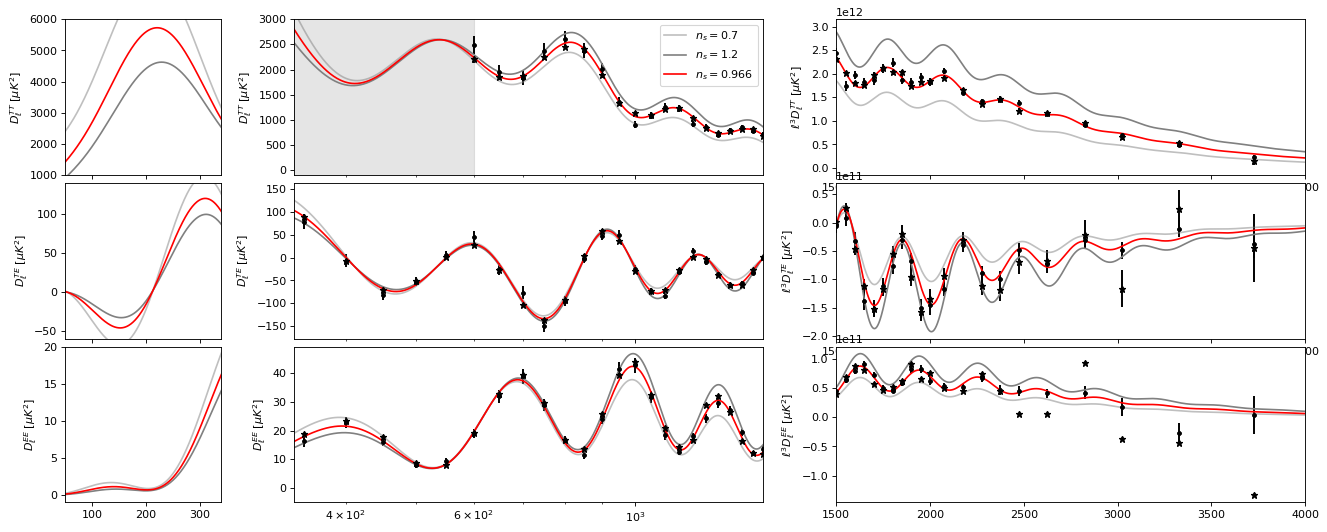

In [18]:
plot_spectra(ell, factor, cls_ns, cls_ref, act_cmb, r"$n_s=0.966$", "ns.pdf")

In [19]:
#Let's compute a few cosmologies
cls_As = {}
As_vals = [2.95,3.15]
for i, param in enumerate(As_vals):
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    M = Class()
    M.set(common_settings)
    M.set({'h':0.6732})
    M.set({'ln10^{10}A_s':param})
    M.compute()
    cls_As.update({r"$ln10^{10}A_s=$"+str(param):M.lensed_cl(5000)}) 

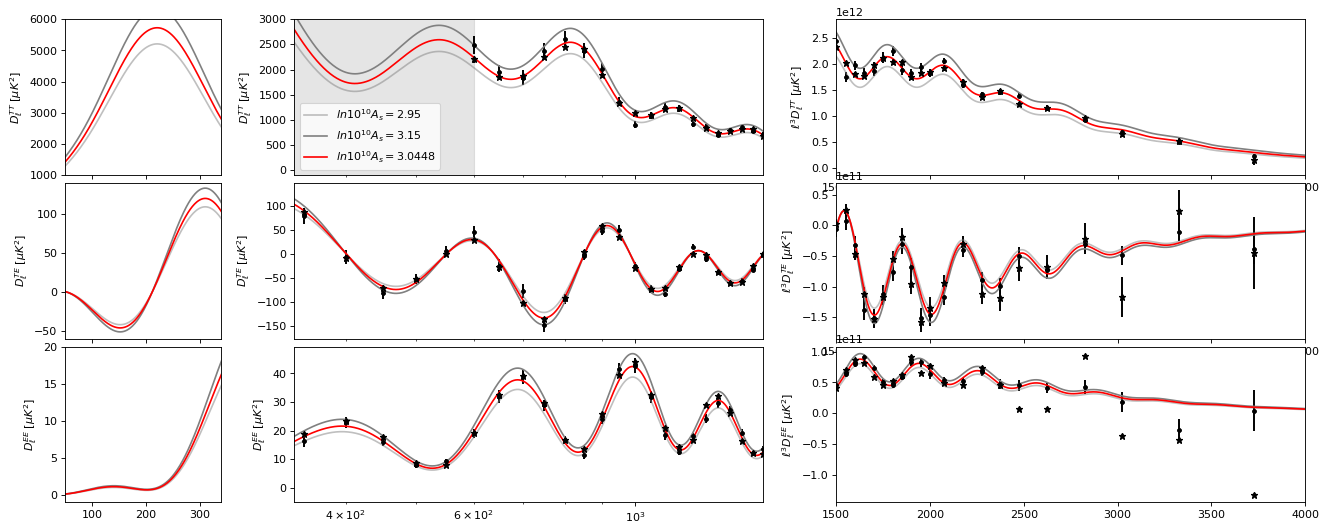

In [20]:
plot_spectra(ell, factor, cls_As, cls_ref, act_cmb, r"$ln10^{10}A_s=3.0448$", "As.pdf")

In [21]:
#Let's compute a few cosmologies
cls_Neff = {}
Neff_vals = [2.5,3.5]
for i, param in enumerate(Neff_vals):
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    M = Class()
    M.set(common_settings)
    M.set({'h':0.6732})
    M.set({'N_eff':param})
    M.compute()
    cls_Neff.update({r"$N_{\rm eff}=$"+str(param):M.lensed_cl(5000)}) 

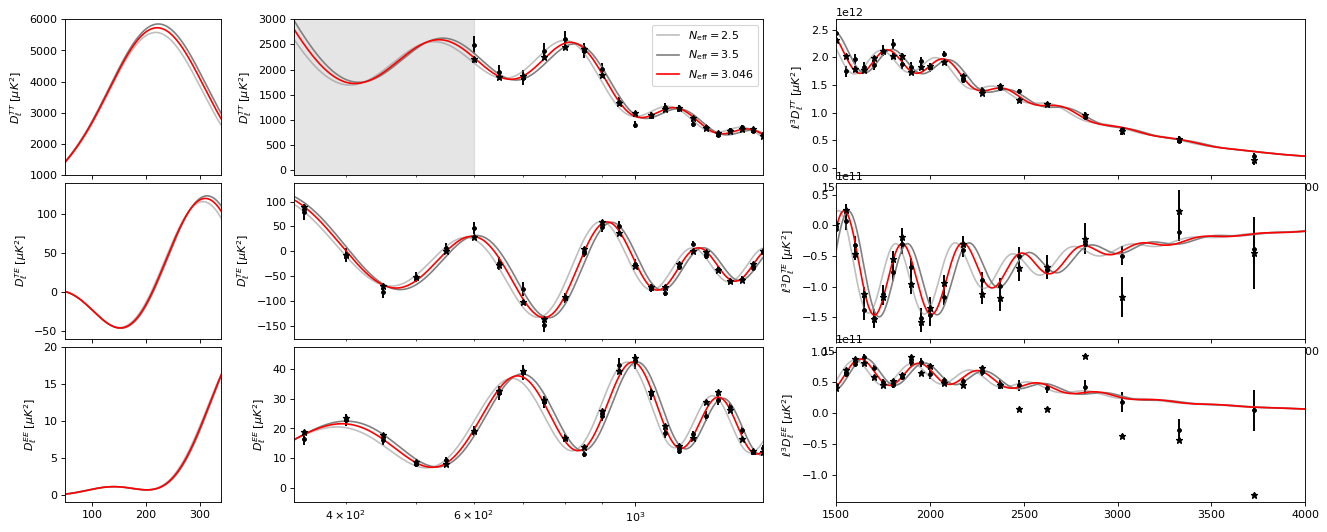

In [22]:
plot_spectra(ell, factor, cls_Neff, cls_ref, act_cmb, r"$N_{\rm eff}=3.046$", "Neff.pdf")